When To Use Standardization:

- K-means
- KNN
- Principle Component Analysis(PCA)
- ANN
- Gradient Decent

Importing the dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day24-standardization/Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.drop(columns = ['User ID','Gender'], axis = 1, inplace = True)

In [5]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns='Purchased',axis = 1),
                                                 df['Purchased'],
                                                 test_size = 0.2,
                                                 random_state = 0
                                                 )

StandardScaler

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scale = StandardScaler()

In [10]:
scale.fit(X_train)
X_train_scaled = scale.transform(X_train)
X_test_scaled = scale.transform(X_test)

In [11]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [12]:
X_train_scaled.describe()

,Age,EstimatedSalary
count,320.000000,3.200000e+02
mean,0.000000,1.110223e-17
std,1.001566,1.001566e+00
min,-1.965480,-1.591382e+00
25%,-0.798951,-7.801636e-01
50%,-0.021265,-1.240367e-02
75%,0.756421,5.235797e-01
max,2.117372,2.319848e+00


In [13]:
X_test_scaled.describe()

,Age,EstimatedSalary
count,80.000000,80.000000
mean,-0.274013,-0.026890
std,1.064621,0.936763
min,-1.965480,-1.591382
25%,-1.090583,-0.664275
50%,-0.312897,0.074513
75%,0.367578,0.472879
max,2.117372,2.319848


Effect of Scaling

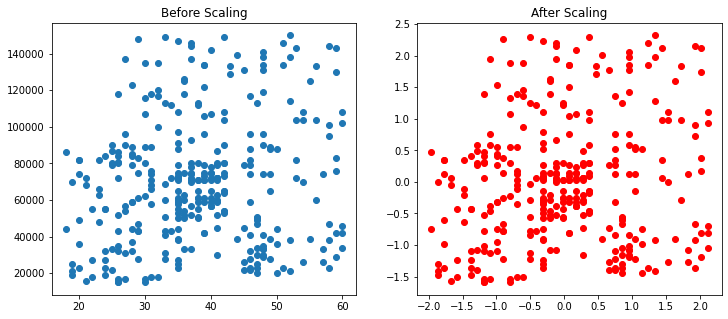

In [14]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')

ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'], color = 'red')
ax2.set_title('After Scaling')

plt.show()

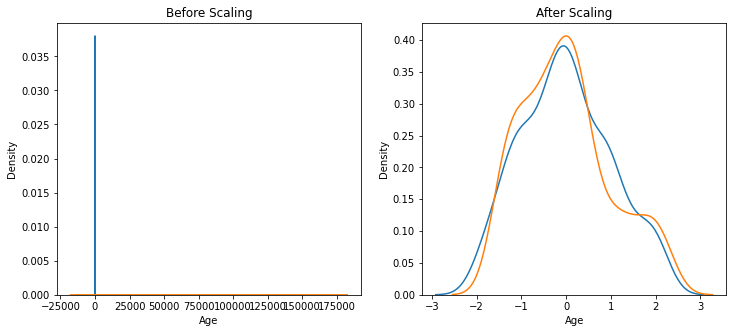

In [15]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize = (12,5))

ax1.set_title('Before Scaling')
sns.kdeplot( X_train['Age'], ax = ax1)
sns.kdeplot( X_train['EstimatedSalary'], ax = ax1)

ax2.set_title('After Scaling')
sns.kdeplot( X_train_scaled['Age'], ax = ax2)
sns.kdeplot( X_train_scaled['EstimatedSalary'], ax = ax2)